# How to Win the Pulitzer Prize

*Group 20 (Error 404 Not Found) : Apoorva, Di Wang, Jingru Liu, 
Peiqing Zuo, Sai Srikar, Sreyas* 

## 1. Introduction
The Pulitzer Prize is regarded as the highest national honor in print journalism, literary achievement, and musical composition. Established in 1917 from funds endowed by journalist and newspaper publisher Joseph Pulitzer, prizes are awarded yearly in twenty-one categories.

Criteria to Win the Pulitzer Prize :
- Only U.S. citizens are eligible to apply for the Prizes in Books, Drama, and Music (except for the History category, in which the book must be a history of the United States, but the author may be of any nationality).
- There are no set criteria for the judging of the Prizes. The definitions of each category are the only guidelines.<br>

Ref: https://www.pulitzer.org/page/frequently-asked-questions

The main goal of the project is to reveal the relationship between the words a book use and its possibility to win the Pulitzer Prize. Also, there are some other characteristics such as the publisher of the book and author feature that influence the prize result to some extent.

**Questions of Interest <br>
● Can we show a correlation between the words used in a book and winning a Pulitzer Prize winning book ? <br>
● Can we quantify different words and associate value to them? <br>
● Does the publisher matter for the award winnning author ? <br>
● Are we able to identify a pattern based on our findings and predict it ? <br>
● Are we able to reject our hypothesis i.e is the prize winner not based on quantitative parameters ? <br>**

The questions of interest are really interesting because we are able to indentify patterns for the winners and are not able to reject the hypothesis . So, we might be be able to game the system of winning the Pulitzer Prize based on the observations and analysis in the notebook.

We create two tables for the whole analysis, one is the *Author Book* table, another is the *Content* table containing all the meaningful words extracted from books we downloaded.

Right now the *Author-Book Information* table has 9 columns, 40 rows of data crawled from Wikipedia. And *Content* table has 31 columns with around 600,000+ rows of English word data when finishing extraction from all the books from both winners and losers.

## 2. Choice for Heavier Grading on Data Processing or Data Analysis
Our project focus more on the collection and processing of data than data analysis. Since the modification of words and display of books information are the main part of our project.





## 3. Data Processing
We separate out processing into two route. One is the creation and display of the winner books information table. Another is the establishment and operation of the exact word content of books dataset.
### 3.1 Creation of Author-Book Table
Data for this table was collected from webscrapping of Wikipedia, which includes information of all winner books and book authors on aspects of year, book genre, auther origin, author age and author gender.

#### 3.1.1 Scrap and Make the Author-Book table
The data was scrapped of the link from wikipedia:<br>**"https://en.wikipedia.org/wiki/Pulitzer_Prize_for_Fiction"** .<br>

The data was cleaned by using string manipulation and non-essential data was removed from the data that was scraped. <br>

The to complete the data we needed the gender of the authors as well , to compute that we used **Genderize** package to automatically compute the gender of the winning author from their first name which is 99 % accurate in it's prediction and found that the prize was won by more men than women .<br>

Bins were also created to put the age of the winnning in a particular author in a particular age category which shows a normal distribution with the median lying around **50-55** years. <br>

There were few **challenges** which happened during the processing  : <br>
<li> A suitable source of data needed to be found, after a lot of search Wikipedia was selected.<br>
<li> The Wikipedia page had two tables we needed to select the appropriate table for our processing. <br>
<li> The data was not clean appropriate cleaning needed to be done and columns need to be added so that visualization could even be possible on the data. <br>
<li> There was no gender for the authors , we needed to find a appropriate source to enter the gender for the authors rather than manually entering them.<br>

The code of generating book-author table is shown as follow which is extracted:

In [ ]:
! pip install genderize

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from genderize import Genderize
import matplotlib.pyplot as plt
import seaborn as sns

# trying to scrape data from wikipedia to get the table for winners and finalists 
# Questions of interest is there any particular publishing house that has most pulitzer prize winners 
# Awards were not given in 2012 hence the record was dropped  

wikiurl="https://en.wikipedia.org/wiki/Pulitzer_Prize_for_Fiction"
table_class="wikitable sortable jquery-tablesorter" # class of the wikipedia table 
response=requests.get(wikiurl)
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
pulitzer_prize_for_fiction =soup.find_all('table',{'class':"wikitable"})[1]
df=pd.read_html(str(pulitzer_prize_for_fiction))
# convert list to dataframe
df=pd.DataFrame(df[0]) # extracting the table from the list 
df['Year_Copy'] = df['Year']
df_winners_finalists = df.set_index('Year').sort_values(by='Year', ascending =False)
#  removing non-essential columns 
del(df_winners_finalists['Winner']) 
del(df_winners_finalists['Finalists'])                         
df_winners_finalists.rename({'Work.1':'Publisher','Winner.1':'Winner'},axis=1,inplace=True) # renaming the columns to appropriate names 
# for the below split removing the brackets to clean the data and extracting based on the split 
df_winners_finalists['Work'] = df_winners_finalists['Work'].str.split('[').str[0]
df_winners_finalists["Author's origin"] = df_winners_finalists["Author's origin"].str.split('(').str[0]
df_winners_finalists['Publisher']  = df_winners_finalists['Publisher'].str.split('(').str[0]
df_winners_finalists['Birth Year'] = df_winners_finalists['Winner'].str.split('(').str[1]
df_winners_finalists['Winner'] = df_winners_finalists['Winner'].str.split('(').str[0]
df_winners_finalists['Birth Year'] = df_winners_finalists['Birth Year'].str.extract('(?P<year>\d\d\d\d)',expand=False) # extracting only the birth year
df_winners_finalists.dropna(axis=0, how='any',inplace=True)
df.head()

,Year,Winner,Winner.1,Work,Work.1,Genre(s),Author's origin,Finalists,Year_Copy
0,1980,NaN,Norman Mailer (1923–2007),The Executioner's Song,"Little, Brown (1979)",True crime novel,New Jersey,"William Wharton, BirdyPhilip Roth, The Ghost W...",1980
1,1981,NaN,John Kennedy Toole (1937–1969),A Confederacy of Dunces (posthumous win),Louisiana State University Press (1980),Picaresque novel,Louisiana,"Frederick Buechner, GodricWilliam Maxwell, So ...",1981
2,1982,NaN,John Updike (1932–2009),Rabbit Is Rich,Alfred A. Knopf (1981),Novel,Pennsylvania,"Robert Stone, A Flag for SunriseMarilynne Robi...",1982
3,1983,NaN,Alice Walker (b. 1944),The Color Purple,Harcourt Brace Jovanovich (1982),Epistolary novel,Georgia,"Anne Tyler, Dinner at the Homesick RestaurantC...",1983
4,1984,NaN,William Kennedy (b. 1928),Ironweed,Viking Press (1983),Novel,New York,"Raymond Carver, CathedralThomas Berger, The Feud",1984


In [ ]:
df_winners_finalists['Birth Year'] = df_winners_finalists['Birth Year'].astype(int) # to convert the birth year to int 
df_winners_finalists['Year_Copy'] = df_winners_finalists['Year_Copy'].astype(int) # to convert the year award given  to int 
df_winners_finalists['Age Prize Received'] =  df_winners_finalists['Year_Copy'] - df_winners_finalists['Birth Year'] # calculate the age when prize was received
bins = np.linspace(start=20, stop=100, num=17, dtype =int)
df_winners_finalists['Year Bin'] = pd.cut(df_winners_finalists['Age Prize Received'], bins)
del(df_winners_finalists['Year_Copy']) # removing the dummy year awrd 
df_winners_finalists['First Name'] = df_winners_finalists['Winner'].str.split(' ').str[0] # extracting the first name so that python can analyse whether M or F
df_winners_finalists.at[1994, 'First Name'] = 'Annie' # Reviewed the data and checked only one value out of place hence manually changing it. 

In [ ]:
def genderize(name): # creating a function genderize which makes use of package 'Genderize' which will determine the author is male or female based on their first name
     return Genderize().get([name])[0]['gender']
df_winners_finalists['Gender_Derived'] = df_winners_finalists.apply(lambda row : genderize(row['First Name']),axis=1).map({'male': 'M','female': 'F'})
del(df_winners_finalists['First Name']) # removing the first name  

##### After text cleaning and  manipulation below is the code that is finally generated.

In [ ]:
df_winners_finalists.head()

,Winner,Work,Publisher,Genre(s),Author's origin,Birth Year,Age Prize Received,Year Bin,Gender_Derived
Year,,,,,,,,,
2021,Louise Erdrich,The Night Watchman,Harpercollins,Novel,Minnesota,1954,67,"(65, 70]",F
2020,Colson Whitehead,The Nickel Boys,Doubleday,Novel,New York,1969,51,"(50, 55]",M
2019,Richard Powers,The Overstory,W. W. Norton & Company,Novel,Illinois,1957,62,"(60, 65]",M
2018,Andrew Sean Greer,Less,"Little, Brown and Company",Satirical novel,"Washington, D.C.",1970,48,"(45, 50]",M
2017,Colson Whitehead,The Underground Railroad,Doubleday,Alternate historical novel,New York,1969,48,"(45, 50]",M


#### 3.1.2 Visualize and Analyze Book-author information
After the book-author table is generated, we can visualize the attributes of this table to come up with some insight.

### 3.2 Establishment and Processing of Words Content data
#### 3.2.1 Collecting PDF Books
**Steps**:
*   Get the list of Pulitzer prize winners and nominees for the category of Fiction from the official website, https://www.pulitzer.org/prize-winners-by-category/219
*   Depending on data availability of both winners and nominees for each year, determine the range of years for which data should be downloaded
*   Download books from open sources for each year based on range decided, i.e., 1980-2021
*   Bifurcate downloaded books into two categories i.e. Winners and Nominees, and store in separate folders
*   Rename books in uniform format 'Book Name_Year_W/L' across all years and categories to identify books as per relevant information

**Result of Download**: 
We eventually collected 41 books that won the award and 47 books of nominees from year 1980 to 2021.

**Arrangement:**
- The data was organized into two folders Winners and Losers 
- A standard naming convention was used to name the books . The books were named as BookName_YYYY_W/L.pdf where W is for Winners and L is for Losers.

There are several challenges when collection pdf data and the risk of lacking of data was considered:

- First, the information of nominees before 1980 can not be found from the official website.
Many of the pdf sources of most recent years winners and nominees can not be access.

- Many book can only be download in other format, we need to convert it to pdf.

Solution: Epub format was converted to .pdf using website. Link:https://cloudconvert.com/epub-to-pdf

There are quite a few books were originally written by languages other than English.

Solution: We choose to download the English version of the book, which may cause some bias for the content expression.
#### 3.2.2 Extract Words from All PDFs
When all PDFs have been prepared, we extract all the meaningful words from PDFs using pdfplumber, nltk, os, itertools, and of course pandas.

There are several steps to process to achieve the quality of content words extracted from the books.

1. First, `pdfplumber()` is used to read PDFs, we loop the reading process from PDFs to pages to exact text of each page;
2. Second, e need to use `word_tokenize()` to separate each words from texts of each page;
3. Third, all the punctuations and stopwords such as 'the' and 'a' are removed;
4. Finally, we apply `nltk.corpus.words.words()`, which is a text corpora, to word list to check the spell and meaningfulness of our word lists.

After process word lists, we apply `nltk.pos_tag()` to categorize and tag words into different classes such as nouns, adverbs, and adjectives. Store the final result as a csv file.

In [ ]:
import pdfplumber # to convert from pdf to txt
import nltk #  to understand words
from nltk.tokenize import word_tokenize # just to get a list of words ['harry','potter',........]
from nltk.corpus import stopwords # to remove words like 'the', 'a', 'an' ....
import pandas as pd  # know  
import os # package to access files in computer
import itertools #flatten 2d list

directory = '/Users/liujingru/Desktop/704/Final Project/pdf_samples/'
df_final = pd.DataFrame(columns=['Adjective', 'Adverb', 'Noun', 'Book'])
for pdf in os.listdir(directory):
    if pdf.endswith(".pdf"):
        #taking the file as input
        pdf = pdfplumber.open(directory+pdf)
        count = 0 #the starting page
        text_temp = ""
        text = "" #will store all the words
        
        #loops through all the pages in the book
        while count < len(pdf.pages):
            page = pdf.pages[count] #get the page content 
            text_temp = page.extract_text() #extract text from the page content
            if(text_temp is not None): #we need this if condition to not include pages that have only images or no text
                text += text_temp
            count += 1 #move to next page
        
        tokens = word_tokenize(text)#stores each word from a sentence 
        
        punctuations = ['(',')',';',':','[',']',',','\'','-','.','\"','`','?','\'\'','``','’','“','!'] #we do not want punctuations so we create a list to check for them
        
        stop_words = stopwords.words('english') #stop words are non-essential/non-trivial words used in the english language like "the","a" etc
        
        keywords = [word for word in tokens if not word in stop_words and not word in punctuations] #get words that are not stopwords or punctuations
        
        english_set = set(w.lower() for w in nltk.corpus.words.words())
        keywords = [word.lower() for word in keywords]
        keywords = [word for word in keywords if word in english_set]
        keywords = [word.split('-|--') for word in keywords]
        keywords = list(itertools.chain.from_iterable(keywords))

        temp = nltk.pos_tag(keywords) #assigns tags to all the words we are storing in keywords
        
        columns = {} #dictionary to store columns {noun - [Di wang, Peiqing, Sai], Verb - [Doing project, working]}
        adjective = []
        adverb = []
        noun = []
        book = []
        book.append(pdf)
        print("Extracting all words...")
        #loop to go through the list temp that stores all tags along with the word
        for word in temp:
            if word[1] == "JJ":
                adjective.append(word[0])
            elif word[1] == "NN":
                noun.append(word[0])
            elif word[1] == "RB":
                adverb.append(word[0])
        
        print("Extracted all words from",pdf)
        columns['adjective'] = adjective
        columns['adverb'] = adverb
        columns['noun'] = noun
        #get max length of column to have columns of same length
        length = max(len(adjective),len(adverb),len(noun))
        book = [item for item in book for i in range(length)]
        columns['Book'] = book
        
        #converting to csv
        data = list(itertools.zip_longest(columns['adjective'],columns['adverb'],columns['noun'],columns['Book']))
        #data = list(zip(columns['adjective'],columns['adverb'],columns['noun']))
        df = pd.DataFrame(data = data, columns = ['Adjective','Adverb','Noun','Book'])
        #Fill blank cells of to each book's words table with NaN.
        df.head()
        #Accumulate dataframes of reach book words table
        df_final = df_final.append(df)
    else:
        continue
        
df.to_csv('/Users/liujingru/Desktop/704/Final Project/data_sample.csv',index=False,header=True)


## 4. Data Analysis
### 4.1 Analysis for Book-author Table

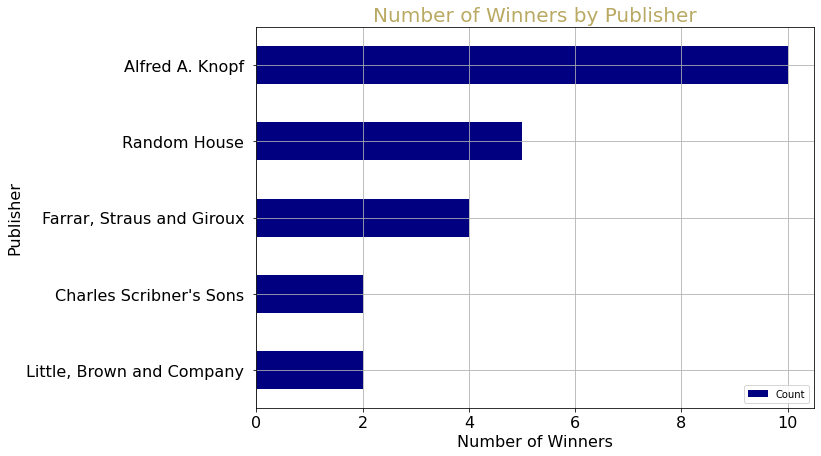

In [ ]:
# Determine if there any particular Publishers that are associated more frequently with winners
dfPublisherCount = df_winners_finalists.groupby(['Publisher']).size().sort_values(ascending = True).to_frame('Count')
# filter out only top 5 Publishers
dftopPublishers = dfPublisherCount.tail()
# Chart to bifurcate winners based on Publishers
axis =  dftopPublishers.plot.barh(fontsize=16, figsize = (10,7),grid=True, color='#000080')
plt.title('Number of Winners by Publisher', fontsize=20 , color ='#B9A962')
plt.ylabel('Publisher', fontsize=16)
plt.xlabel('Number of Winners', fontsize=16)
plt.show()

#### **Popular Publishers：**

The Publisher 'Alfred A. Knopf' has a staggeringly high number of winners associated with it, i.e. 10 books, in the last 30 years alone. This number is twice that of the runner up, 'Random House'. 
<br>
An interesting fact to be noted here is that 'Random House' is the parent company of 'Alfred A. Knopf' since 1960. Together, these two publishers make up 50% Publishers that published the books of Nobel Prize winners in the last 30 years.

### 4.2 Analysis from Content Word Table
#### 4.2.1 Analysis of Word Amount
Explanatory analysis on number of meaningful words from winner and losers have been visualized by count mean, median for both winners and losers and compare the differences.

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.27-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive # 此时colab中出现drive的文件夹，里面就是你的google drive的根目录文件


In [ ]:
import os
os.chdir("drive/704_TA/PDF/Winners/") 

FileNotFoundError: ignored

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

path = ''
df_w_original = pd.read_csv (path + 'Winners.csv')

#As there are np.nan in the table, replace nan into 0 and other word into 1
df_w=df_w_original.replace(np.nan,int(0))
df_w.loc[df_w.Adjective!=int(0),'Adjective']=int(1)
df_w.loc[df_w.Adverb!=int(0),'Adverb']=int(1)
df_w.loc[df_w.Noun!=int(0),'Noun']=int(1)

grouped=df_w.groupby(['Book']) #Group the data by Book title
Adjective_w=grouped['Adjective'].sum() #Calculate the Adjective of each book
print(f'The mean number of adjectives from winner books is {Adjective_w.mean():.0f}.')
print(f'The median number of adjectives from winner books is {Adjective_w.median():.0f}.')

grouped=df_w.groupby(['Book'])
Adverb_w=grouped['Adverb'].sum() #Calculate the Adverb of each book
print(f'The mean number of adverb from winner books is {Adverb_w.mean():.0f}.')
print(f'The median number of adverb from winner books is {Adverb_w.median():.0f}.')

grouped=df_w.groupby(['Book'])
Noun_w=grouped['Noun'].sum() #Calculate the Adjective of each book
print(f'The mean number of noun from winner books is {Noun_w.mean():.0f}.')
print(f'The median number of noun from winner books is {Noun_w.median():.0f}.')

The mean number of adjectives from winner books is 8673.
The median number of adjectives from winner books is 7758.
The mean number of adverb from winner books is 4243.
The median number of adverb from winner books is 3558.
The mean number of noun from winner books is 18234.
The median number of noun from winner books is 16072.


In [ ]:
path = ''
df_l_original = pd.read_csv (path + 'Losers.csv')

#As there are np.nan in the table, replace nan into 0 and other word into 1
df_l=df_l_original.replace(np.nan,int(0))
df_l.loc[df_l.Adjective!=int(0),'Adjective']=int(1)
df_l.loc[df_l.Adverb!=int(0),'Adverb']=int(1)
df_l.loc[df_l.Noun!=int(0),'Noun']=int(1)

grouped=df_l.groupby(['Book']) #Group the data by Book title
Adjective_l=grouped['Adjective'].sum() #Calculate the Adjective of each book
print(f'The mean number of adjectives is {Adjective_l.mean():.0f}.')
print(f'The median number of adjectives is {Adjective_l.median():.0f}.')

grouped=df_l.groupby(['Book'])
Adverb_l=grouped['Adverb'].sum() #Calculate the Adverb of each book
print(f'The mean number of adverb is {Adverb_l.mean():.0f}.')
print(f'The median number of adverb is {Adverb_l.median():.0f}.')

grouped=df_l.groupby(['Book'])
Noun_l=grouped['Noun'].sum() #Calculate the Adjective of each book
print(f'The mean number of noun is {Noun_l.mean():.0f}.')
print(f'The median number of noun is {Noun_l.median():.0f}.')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.



The mean number of adjectives is 7760.
The median number of adjectives is 7027.
The mean number of adverb is 3778.
The median number of adverb is 3513.
The mean number of noun is 16738.
The median number of noun is 15534.


In [ ]:
#Gather the data into chart table
data={'Type':['Winner','Winner','Winner','Loser','Loser','Loser'],
      'Word':['Adjective','Adverb','Noun','Adjective','Adverb','Noun'],
      'Number':[(Adjective_w.mean()),(Adverb_w.mean()),(Noun_w.mean()),(Adjective_l.mean()),(Adverb_l.mean()),(Noun_l.mean())]
     }
df_chart_mean=pd.DataFrame(data)
df_chart_mean

,Type,Word,Number
0,Winner,Adjective,8673.116279
1,Winner,Adverb,4243.372093
2,Winner,Noun,18233.767442
3,Loser,Adjective,7759.638298
4,Loser,Adverb,3778.276596
5,Loser,Noun,16737.659574


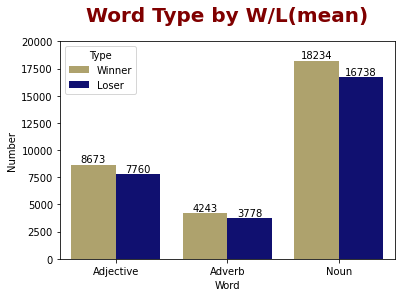

In [ ]:
axis = sns.barplot(x=df_chart_mean.Word, y=df_chart_mean.Number, hue=df_chart_mean.Type, palette=['#B9A962', '#000080'])
axis.set_title('Word Type by W/L(mean)', fontdict={'fontsize': 20, 'fontweight': 700, 'color': 'maroon'}, pad=20)
axis.set_ylim([0,20000])

for p in axis.patches:
    height = p.get_height()
    axis.annotate(f'{height:.0f}',xy=(p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

According to the result of mean and median counts for winner books and loser books, it's obvious that no matter on mean or median, noun, adjective, or adverb, winner books are having a larger amount of meaningful words than loser books. This indicates that the winner books usually have a larger volume and are likely to contain more colorful vocabulary.
#### 4.2.2 Word Length Analysis



## 5. Conclusions
### Is Age a factor?
As can be seen from the chart above, a lot of authors tend to win between the Age 45-50, followed by 50-55. This could be on account of the fact that this may be the age around which an author's writing style improves substantially or matures in a way that helps them deliver their best works.

It is also interesting to observe that the data is normally distributed, with the mode centered around 45-50.

authors need more adverbs, nouns, adjectives to win 

publisher

writing style - revolve stories around central characters + varied sentence structure - incorporate words of varied lengths
from the table - 

women less likely
 
 
age group


## Reference:

[1]A single-page tutorial - information retrieval and text mining. Tf. (n.d.), http://www.tfidf.com/. 

[2]The Pulitzer Prize - Fiction. The Pulitzer Prizes, https://www.pulitzer.org/prize-winners-by-category/219. 

[3]Accessing Text Corpora and Lexical Resources, https://www.nltk.org/book/ch02.html. 

[4]Categorizing and Tagging Words, https://www.nltk.org/book/ch05.html. 

[5] “Genderize” PyPI, https://pypi.org/project/Genderize/. 
https://pypi.org/project/Genderize/

[6] “Matplotlib 3.5.0 Documentation” Matplotlib Documentation - Matplotlib 3.5.0 Documentation, https://matplotlib.org/stable/. 

## Appendex：
- The pdfs are stored in https://drive.google.com/drive/folders/1Drbg3kttuwYFheGZjxwP23455XkSz4Lh?usp=sharing 
- The sample result of Content table stored in https://drive.google.com/drive/folders/14ky_IGy2cZrkt8PGZ_wog8jKius-TAry?usp=sharing
